In [1]:
import prepare
import env
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy import stats
import numpy as np
from sklearn.cluster import KMeans
import model


# Acquire

In [2]:
zillow = pd.read_csv("zillow_data.csv")

/usr/local/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (37,38,62,65,66,68) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Prepare

In [3]:
zillow = prepare.drop_null_col(zillow)

In [4]:
zillow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77575 entries, 0 to 77574
Data columns (total 35 columns):
Unnamed: 0                      77575 non-null int64
heatingorsystemtypeid           49570 non-null float64
propertylandusetypeid           77575 non-null float64
parcelid                        77575 non-null int64
id                              77575 non-null int64
bathroomcnt                     77575 non-null float64
bedroomcnt                      77575 non-null float64
buildingqualitytypeid           49809 non-null float64
calculatedbathnbr               76960 non-null float64
calculatedfinishedsquarefeet    77375 non-null float64
finishedsquarefeet12            73920 non-null float64
fips                            77575 non-null float64
fullbathcnt                     76960 non-null float64
latitude                        77575 non-null float64
longitude                       77575 non-null float64
lotsizesquarefeet               69318 non-null float64
propertycountylan

In [5]:
col_obj = ["heatingorsystemtypeid", "parcelid", "id", "fips", "latitude", "longitude", "yearbuilt", "assessmentyear", "censustractandblock", "regionidcity", "regionidzip", "regionidcounty", "propertylandusetypeid"]

zillow[col_obj] = prepare.change_dtypes(zillow, col_obj, "object")

In [6]:
zillow = prepare.impude_values(zillow)

/usr/local/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [7]:
col_drop = ["propertyzoningdesc", "heatingorsystemtypeid", "calculatedbathnbr", "fullbathcnt", "Unnamed: 0"]

zillow.drop(columns = col_drop)

propertylandusetypeid   parcelid       id  bathroomcnt  bedroomcnt  \
0                       261   10711855  1087254          2.0         3.0   
1                       261   10711877  1072280          2.0         4.0   
2                       261   10711888  1340933          2.0         4.0   
3                       261   10711910  1878109          2.0         3.0   
4                       261   10711923  2190858          2.0         4.0   
...                     ...        ...      ...          ...         ...   
77569                   266  167655959   179190          3.0         3.0   
77570                   261  167686999   775695          0.0         0.0   
77571                   266  167687739  2863262          0.0         0.0   
77572                   261  167687839  1372384          0.0         0.0   
77573                   266  167688532  2758757          3.0         3.0   

       buildingqualitytypeid  calculatedfinishedsquarefeet  \
0                        8.0                        2107.0   
1                        8.0                        1882.0   
2                        8.0                        1882.0   
3                        8.0                        1477.0   
4                        8.0                        1918.0   
...                      ...                           ...   
77569                    4.0                        1861.0   
77570                    8.0                        1523.0   
77571                    8.0                        1523.0   
77572                    8.0                        1523.0   
77573                    4.0                        1661.0   

       finishedsquarefeet12  fips     latitude  ...  \
0                    2107.0  6037  3.42226e+07  ...   
1                    1882.0  6037  3.42203e+07  ...   
2                    1882.0  6037  3.42225e+07  ...   
3                    1477.0  6037  3.42219e+07  ...   
4                    1918.0  6037  3.42206e+07  ...   
...                     ...   ...          ...  ...   
77569                1861.0  6037  3.39151e+07  ...   
77570                1524.0  6037  3.44241e+07  ...   
77571                1524.0  6037  3.40417e+07  ...   
77572                1524.0  6037  3.40482e+07  ...   
77573                1661.0  6037   3.4109e+07  ...   

      structuretaxvaluedollarcnt  taxvaluedollarcnt assessmentyear  \
0                       249655.0           624139.0           2016   
1                       253000.0           660000.0           2016   
2                       257591.0           542923.0           2016   
3                        57968.0            78031.0           2016   
4                       167869.0           415459.0           2016   
...                          ...                ...            ...   
77569                   359195.0          1044387.0           2016   
77570                        NaN            26405.0           2016   
77571                  5451600.0          6440197.0           2016   
77572                        NaN          1842678.0           2016   
77573                        NaN           147921.0           2016   

       landtaxvaluedollarcnt  taxamount censustractandblock  logerror  \
0                   374484.0    7659.36        6.037113e+13 -0.007357   
1                   407000.0    8123.91        6.037113e+13  0.021066   
2                   285332.0    6673.24        6.037113e+13  0.077174   
3                    20063.0    1116.46        6.037113e+13 -0.041238   
4                   247590.0    5239.85        6.037113e+13 -0.009496   
...                      ...        ...                 ...       ...   
77569               685192.0   14424.81        6.037137e+13 -0.130756   
77570                26405.0     988.48        6.037137e+13 -0.068632   
77571               988597.0   77045.13        6.037137e+13  0.360020   
77572              1842678.0   22045.81        6.037137e+13  0.038797   
77573               147921.0    1902.75    

In [8]:
zillow.fips.value_counts()

6037.0    47640
6059.0    20400
6111.0     5771
Name: fips, dtype: int64

In [9]:
zillow = prepare.wrangle_zillow()

/usr/local/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3249: DtypeWarning: Columns (37,38,62,65,66,68) have mixed types. Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [10]:
zillow.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59709 entries, 0 to 59708
Data columns (total 32 columns):
propertylandusetypeid           59709 non-null object
parcelid                        59709 non-null object
id                              59709 non-null object
bathroomcnt                     59709 non-null float64
bedroomcnt                      59709 non-null float64
buildingqualitytypeid           59709 non-null float64
calculatedfinishedsquarefeet    59709 non-null float64
finishedsquarefeet12            59709 non-null float64
fips                            59709 non-null int64
latitude                        59709 non-null object
longitude                       59709 non-null object
lotsizesquarefeet               59709 non-null float64
propertycountylandusecode       59709 non-null object
rawcensustractandblock          59709 non-null float64
regionidcity                    59709 non-null float64
regionidcounty                  59709 non-null object
regionidzip         

In [11]:
zillow.dropna().fips.value_counts()

6037    36234
6059    18200
6111     5275
Name: fips, dtype: int64

In [12]:
zillow.shape

(59709, 32)

In [13]:
# zillow.to_csv("zillow_prep_data.csv")

# Feature Engineering

A couple of features that I want to create:

* Total Room Count (bedrooms + bathrooms)
* Age of Home (2017 - year built)
* Value Ratio (parcel tax ÷ property tax).

I also want to see if the log error changes based on:

* location
* when the house was built
* size

In [14]:
# Create a new "age_home"

zillow["age_home"] = 2017 - zillow.yearbuilt

In [15]:
# total_property_size (combine calculated square feet of the house plus the size of the lot)

zillow["total_size"] = zillow.finishedsquarefeet12 + zillow.lotsizesquarefeet

In [16]:
# value_ratio = qhat is the rate between home tax and property tax
zillow["value_ratio"] = zillow.landtaxvaluedollarcnt / zillow.taxamount

In [17]:
# What the tax rate is 

zillow["tax_rate"] = zillow.taxamount / zillow.taxvaluedollarcnt

# Scaling

In [18]:
zillow_unscaled = zillow

In [19]:
df_scaling = zillow.select_dtypes(exclude="object")

In [20]:
scaler, df_scaled = prepare.min_max_scaler_explore(df_scaling)

In [21]:
df_object = zillow.select_dtypes("object")

In [22]:
zillow = pd.concat([df_object, df_scaled], axis=1)

# Explore

/usr/local/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


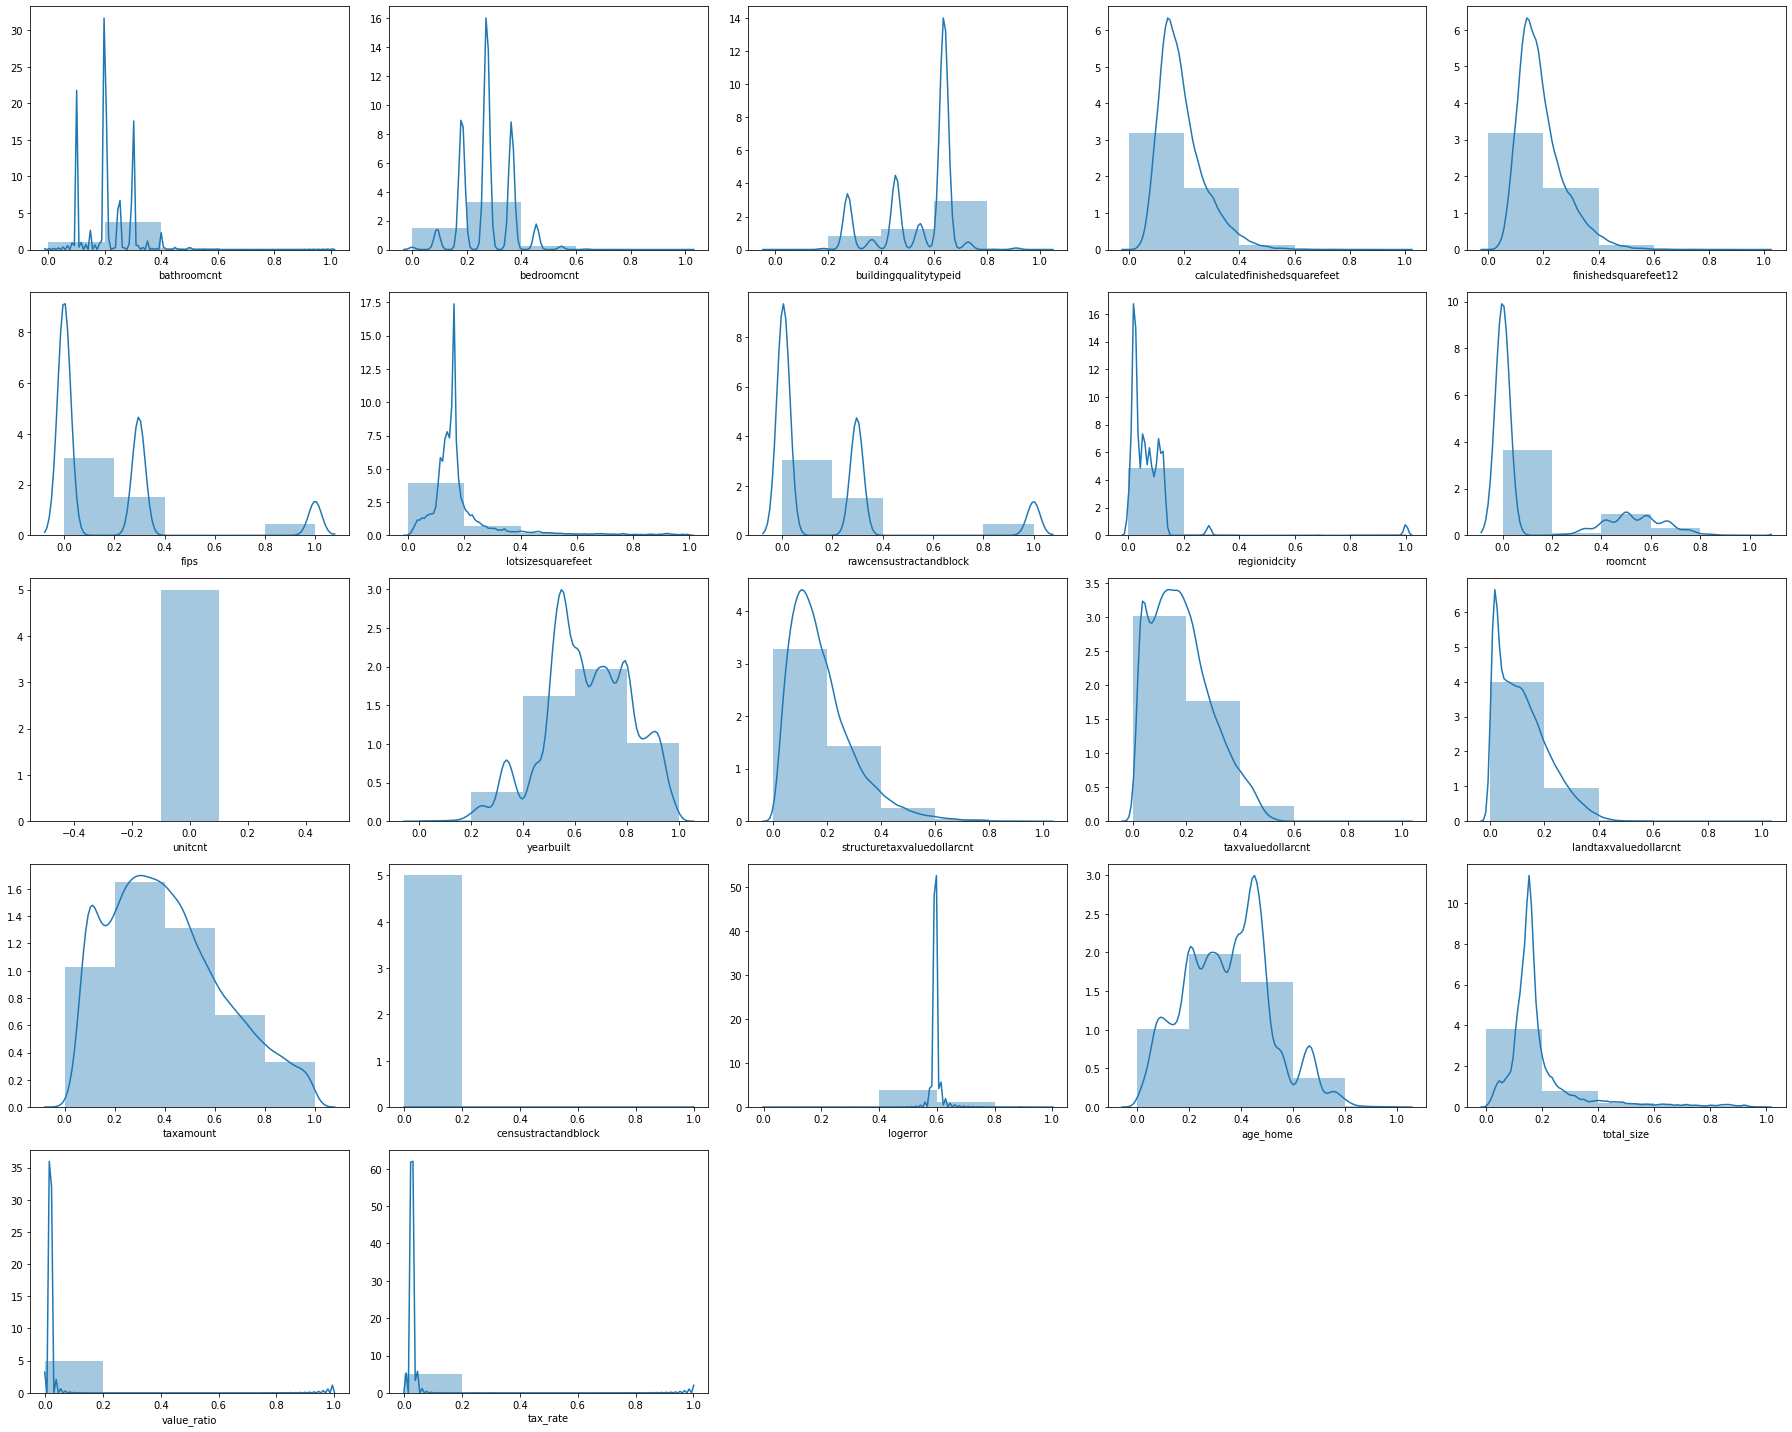

In [23]:
# How is the data distributed?

continuious = zillow.select_dtypes("number")
f = plt.figure(figsize=(25,20))
for i in range(continuious.shape[1]):
    f.add_subplot(5,5, i+1)
    sns.distplot(continuious.iloc[:,i], bins=5)
plt.tight_layout()
plt.show()
    

In [24]:
# We will begin by clustering the target variable - then comparing it to other variables to see if there is a pattern.

zillow, centroid = model.create_cluster(zillow, 5, ["logerror"], "logerror_cluster")
zillow.logerror_cluster.value_counts()

cluster_1    52963
cluster_3     3862
cluster_2     2683
cluster_5      161
cluster_4       40
Name: logerror_cluster, dtype: int64

We can see that cluster_3 and cluster_4 more likely refers to the outliers, while cluster_1 and cluster_2 holds the bulks of the data.

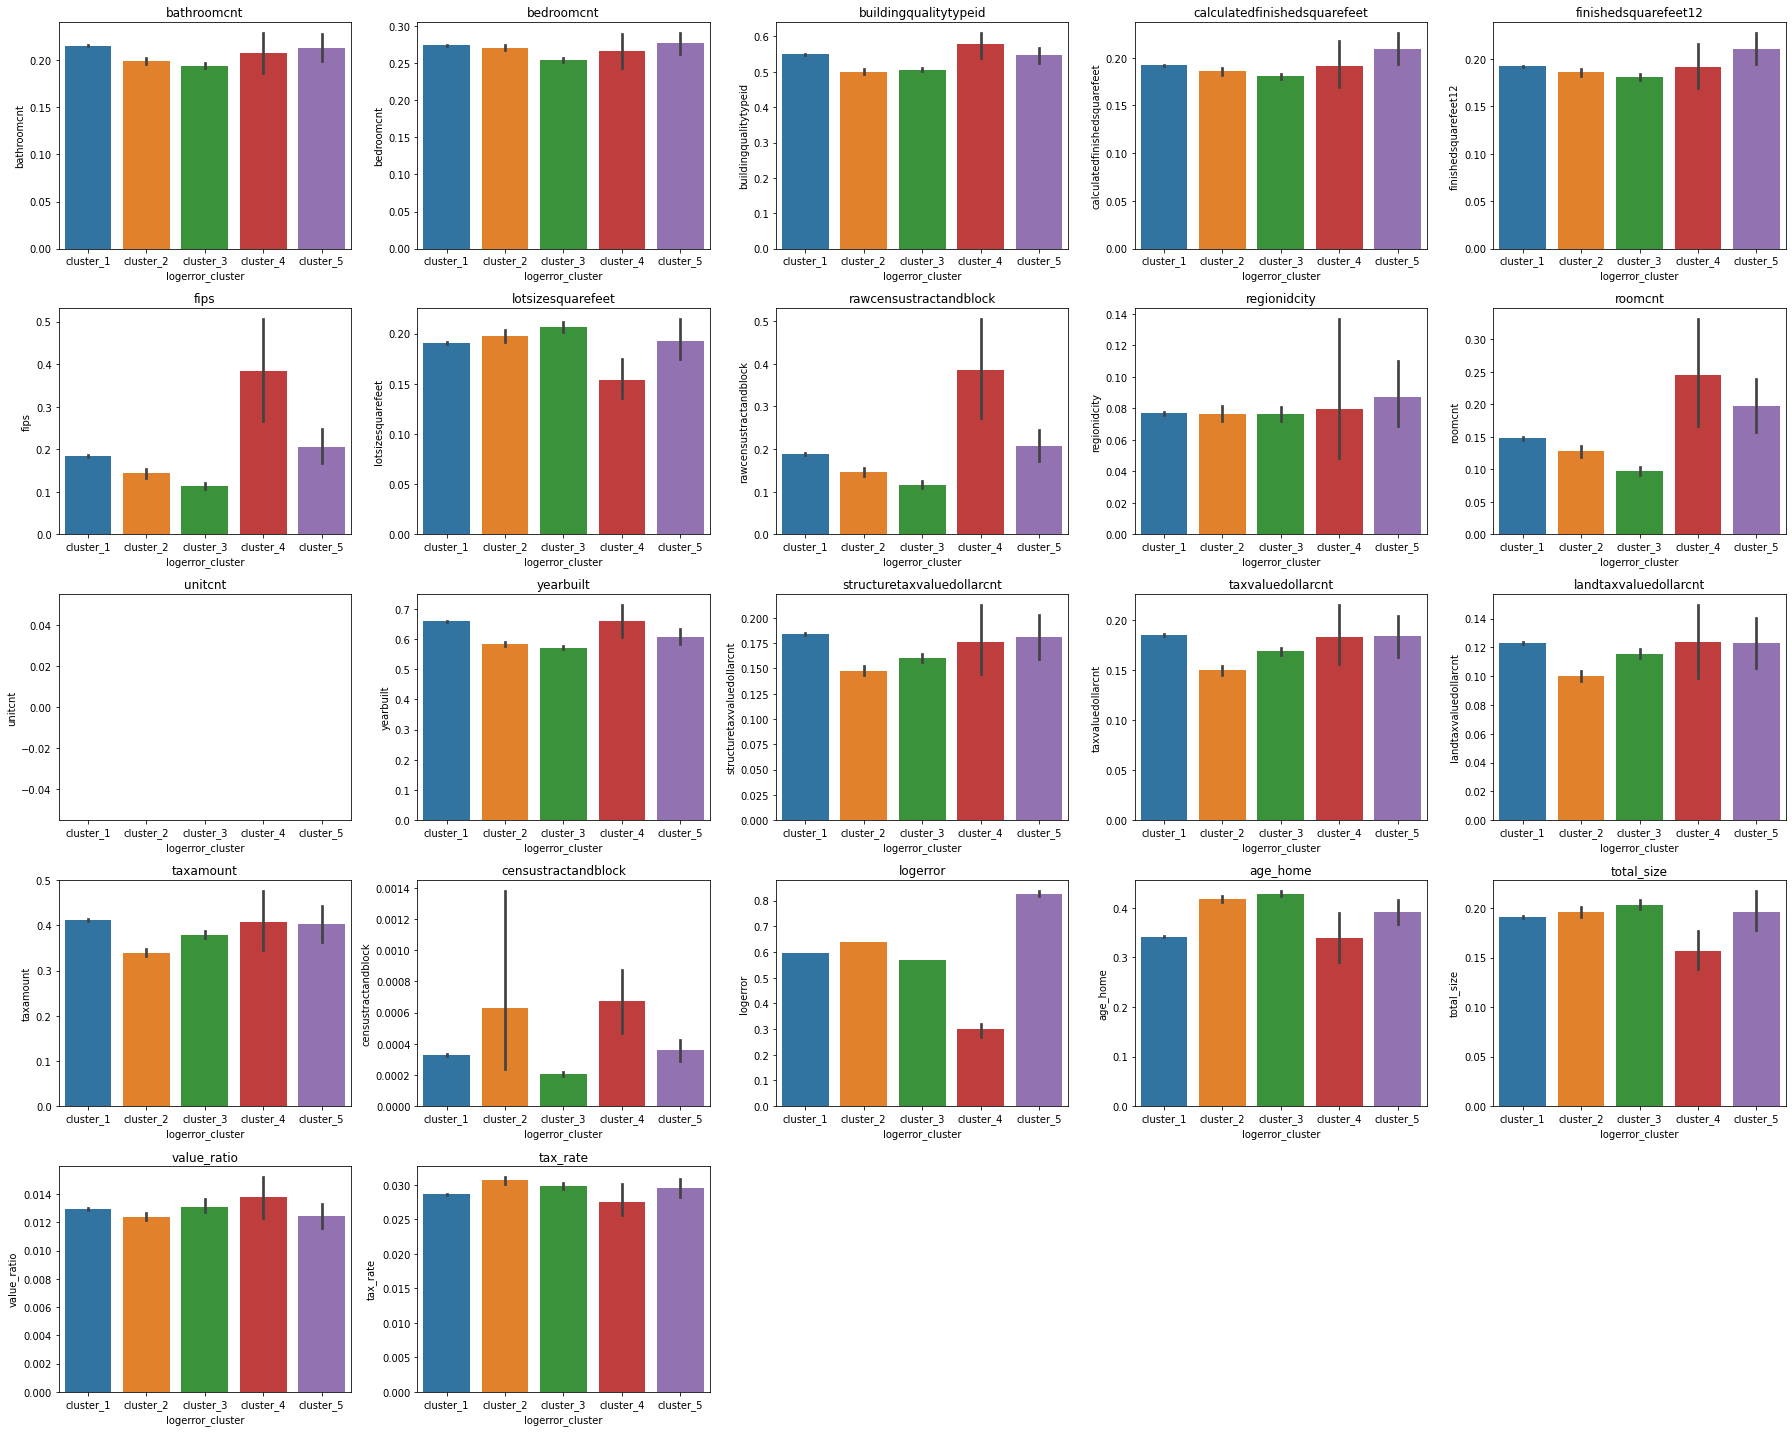

In [25]:
continuious_df = zillow.select_dtypes("number")

f = plt.figure(figsize=(25,20))
for i in range(continuious_df.shape[1]):
    f.add_subplot(5,5, i+1)
    sns.barplot(data=zillow, x="logerror_cluster", y=continuious_df.iloc[:,i])
    plt.title(continuious_df.columns[i])
plt.tight_layout()
plt.show()


The graph above looks to see if there are any clear groupings that could help us identify what is driving logerror. So far, we can see that there are infact some groupings that might help us predict logerror.

* Groupings that have no clear relationship:
    * `bathroomcnt`
    * `bedroomcnt`
    * `buildingqualityid`

This groups don't seem to have a super strong correlation of any kind, as the log error is evently distributed.

* Features that do show a strong relationship: 
    * `calculatedfinishedsquarefeet`
    * `fips`
    * `rawcensusblocktrack`
    * `roomcnt`
    * `taxvaluedollarcnt`
    * `landtaxvaluedollarcnt`
    * `taxamount`
    * `age_home`
    * `value_ratio`
    
These have very distrinct groups, which means we might be able to use them to accurately predict the patterns that can help us model logerror. 

One anomaly to point out - there seems to be that `tax_rate` only shows up in three of the clusters. This is really weird as the values used to derived this features are present in all four clusters.   
    

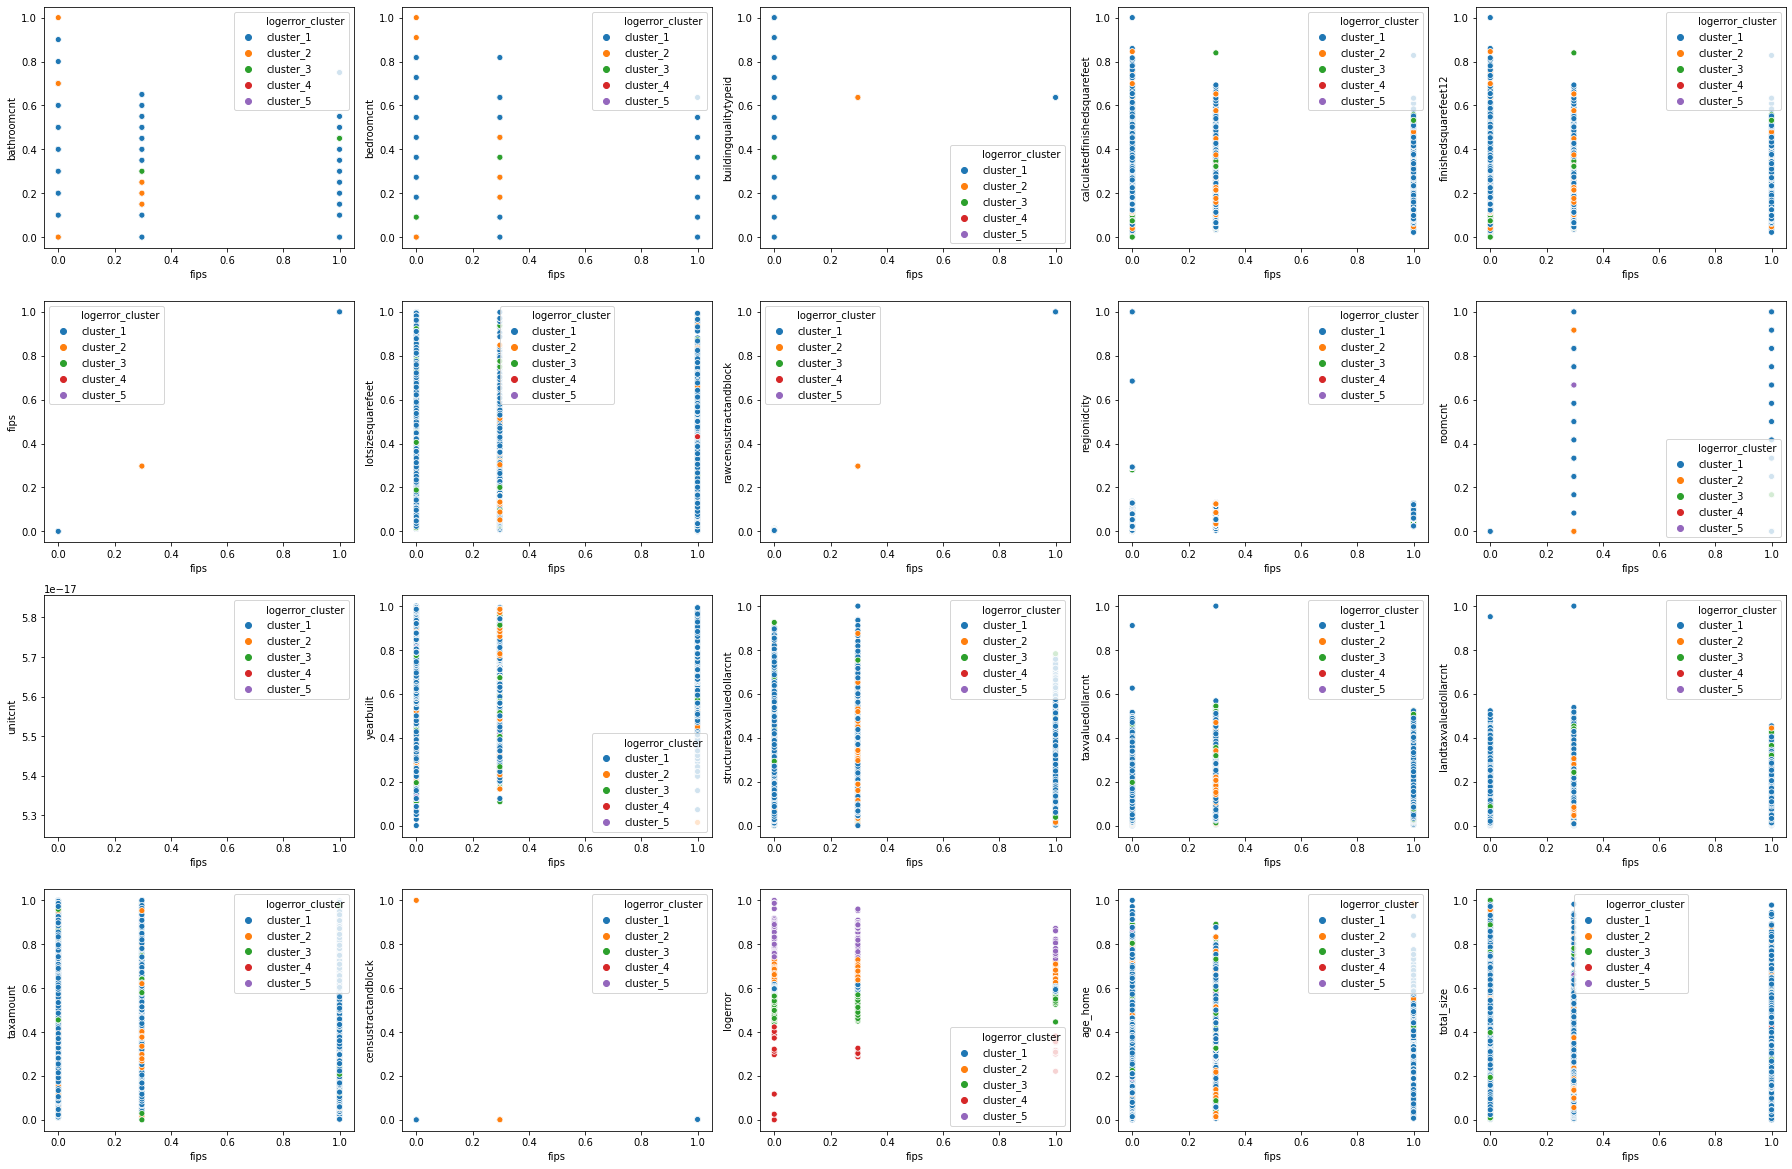

In [26]:
f = plt.figure(figsize=(25,20))
for i in range(20):
    f.add_subplot(5,5, i+1)
    sns.scatterplot(data=zillow, y=continuious_df.iloc[:,i], x="fips", hue="logerror_cluster")
#     plt.title(f"{continuious_df.columns[i]} x {continuious_df.columns[i+1]}")
plt.tight_layout()
plt.show()

/usr/local/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


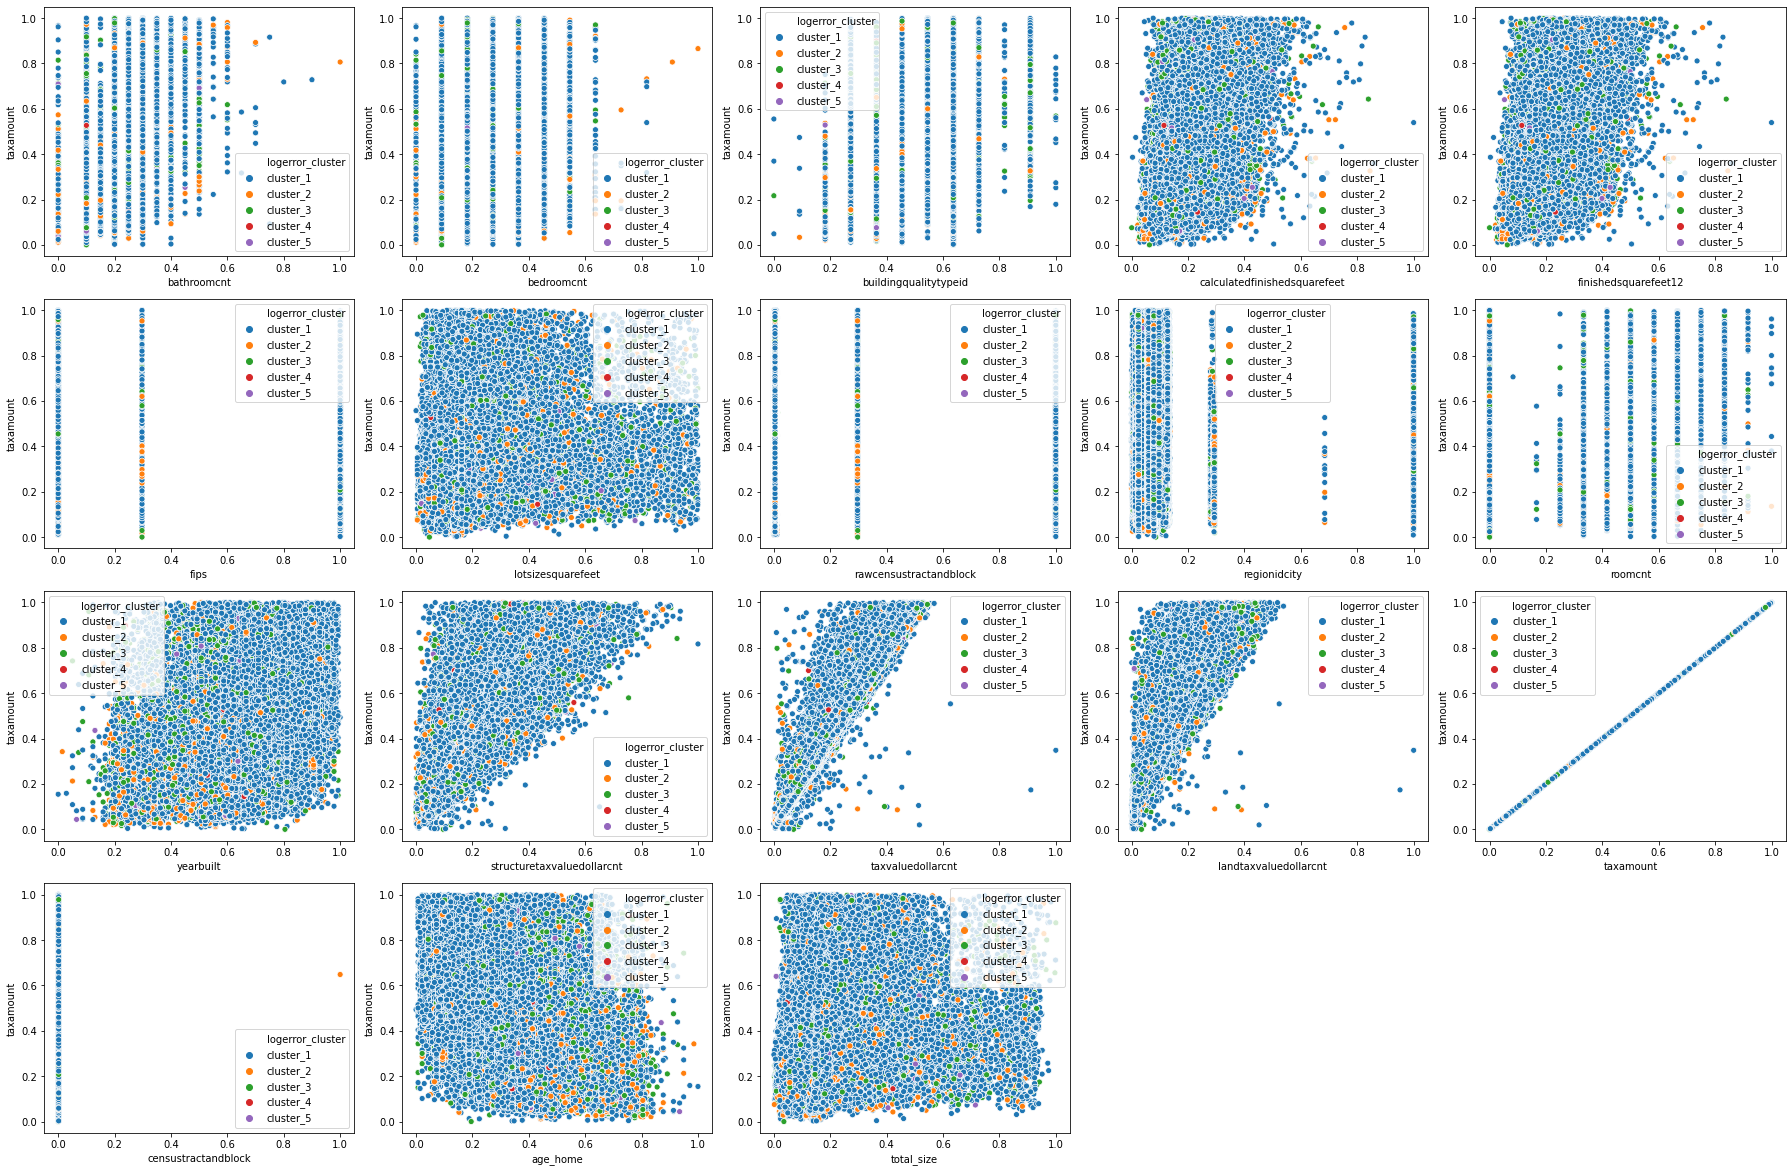

In [27]:
continuious_df = zillow.select_dtypes("number")
continuious_df.drop(columns=["logerror", "unitcnt"], inplace=True)

f = plt.figure(figsize=(25,20))
for i in range(continuious_df.shape[1]-2):
    f.add_subplot(5,5, i+1)
    sns.scatterplot(data=zillow, x=continuious_df.iloc[:,i], y="taxamount", hue="logerror_cluster")
#     plt.title(f"{continuious_df.columns[i]} x {continuious_df.columns[i+1]}")
plt.tight_layout()
plt.show()

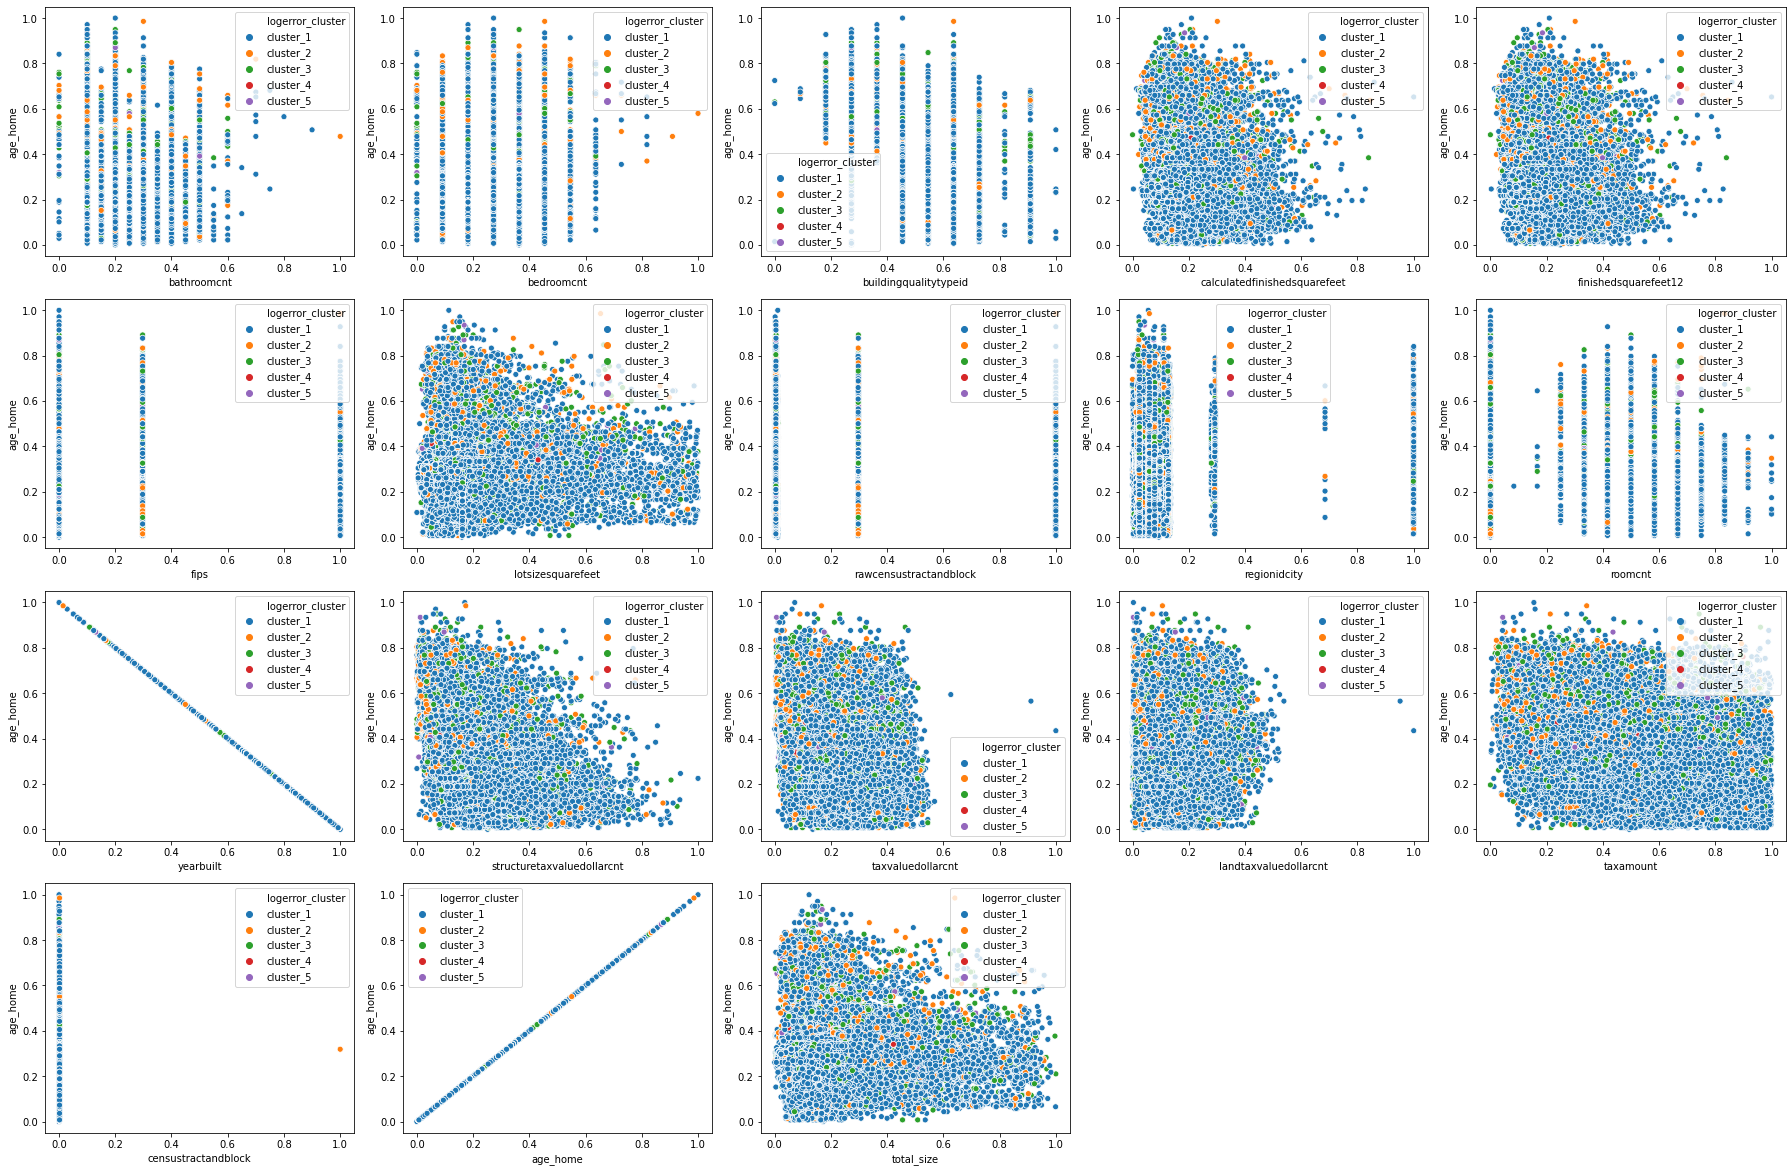

In [28]:
continuious_df = zillow.select_dtypes("number")
continuious_df.drop(columns=["logerror", "unitcnt"], inplace=True)

f = plt.figure(figsize=(25,20))
for i in range(continuious_df.shape[1]-2):
    f.add_subplot(5,5, i+1)
    sns.scatterplot(data=zillow, x=continuious_df.iloc[:,i], y="age_home", hue="logerror_cluster")
#     plt.title(f"{continuious_df.columns[i]} x {continuious_df.columns[i+1]}")
plt.tight_layout()
plt.show()

It seems that there are no clear distinction between these groups. I think the reason for it has to do with the outliers, which seems to be having a big impact on the groupings. 

Next - we will create new clusters using other independent varibles, to see if we see some trends. 

In [29]:
def k_cluster_all(df, x, n):
    df = df.select_dtypes(exclude="object")
    kmeans = KMeans(n_clusters=n, random_state=123)
    kmeans.fit(df)
    df["cluster"] = kmeans.predict(df)
    df.cluster = 'cluster_' + (df.cluster + 1).astype('str')

    for col in df.columns:
        if col != x and col != "cluster":
            sns.relplot(data=df, x=x, y=col, hue='cluster', alpha=.3)
            plt.show()
    df.drop(columns="cluster", inplace=True)



### Location

We know that tax rate has a big impact, especially because the tax rate changes so much across the counties. We will see if we can combine these features together to create a new cluster.

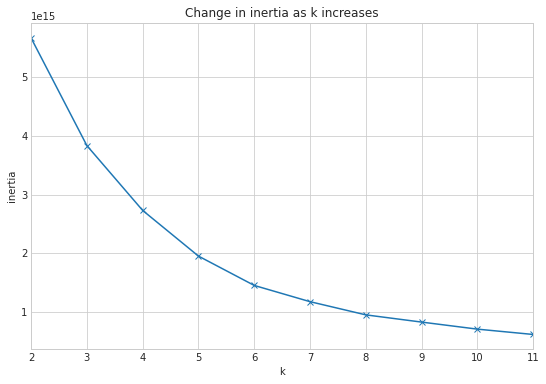

In [30]:
model.create_elbow_graph(zillow, ["tax_rate", "latitude", "longitude" ])

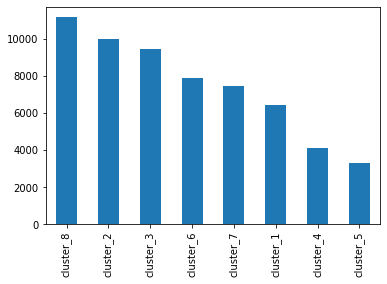

In [31]:
zillow, centroid = model.create_cluster(zillow, 8, ["tax_rate", "latitude", "longitude" ], "tax_location_cluster")
zillow.tax_location_cluster.value_counts().plot.bar()

In [32]:
centroid

array([[ 2.43963314e-02,  3.35847556e+07, -1.17676592e+08],
       [ 2.78389716e-02,  3.41040546e+07, -1.18323840e+08],
       [ 3.10110017e-02,  3.38616586e+07, -1.18219481e+08],
       [ 2.56792732e-02,  3.42361484e+07, -1.19059454e+08],
       [ 3.94183621e-02,  3.46318667e+07, -1.18126736e+08],
       [ 3.02112694e-02,  3.40510067e+07, -1.17941685e+08],
       [ 2.87006238e-02,  3.42707408e+07, -1.18571991e+08],
       [ 2.73614750e-02,  3.37772380e+07, -1.17903053e+08]])

In [33]:
centroid_2 = pd.DataFrame({"tax_rate": centroid[:,0], "latitude": centroid[:,1], "longitude": centroid[:,2]})

In [34]:
centroid_2

tax_rate      latitude     longitude
0  0.024396  3.358476e+07 -1.176766e+08
1  0.027839  3.410405e+07 -1.183238e+08
2  0.031011  3.386166e+07 -1.182195e+08
3  0.025679  3.423615e+07 -1.190595e+08
4  0.039418  3.463187e+07 -1.181267e+08
5  0.030211  3.405101e+07 -1.179417e+08
6  0.028701  3.427074e+07 -1.185720e+08
7  0.027361  3.377724e+07 -1.179031e+08

We have a better distribution of clusters here actually, which is much better. We will now try to see if there are any clear patters that we can desern from this.

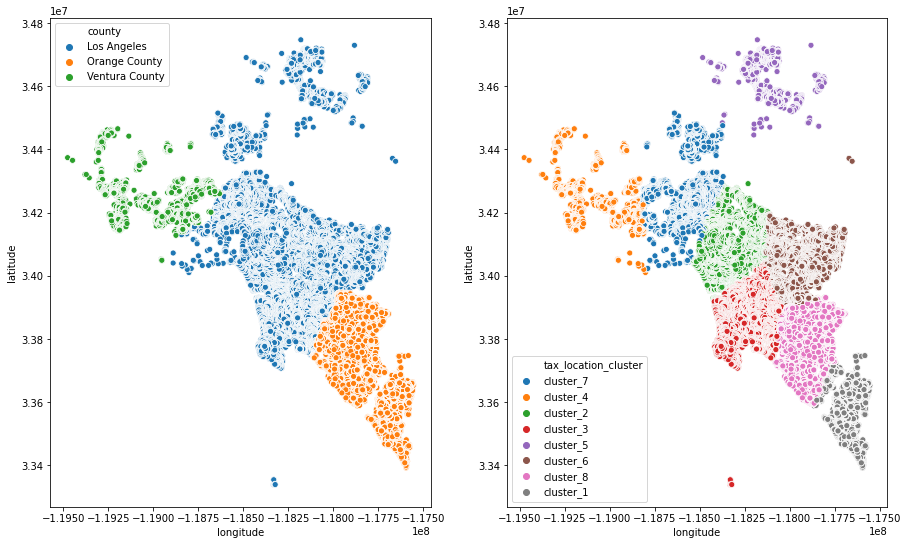

In [35]:
f, axes = plt.subplots(1, 2, figsize=(15, 9))
sns.scatterplot(data=zillow, y="latitude", x="longitude", hue="county", ax=axes[0])
sns.scatterplot(data=zillow, y="latitude", x="longitude", hue="tax_location_cluster", ax=axes[1])

In [36]:
value = zillow.tax_location_cluster.unique()
for i in range(len(value)):
    mean = zillow[zillow.tax_location_cluster == value[i]].logerror.median()
    print(f'{value[i]} has a mean of {mean}')

cluster_7 has a mean of 0.5954922542871152
cluster_4 has a mean of 0.5952673614211246
cluster_2 has a mean of 0.5949869899612648
cluster_3 has a mean of 0.5952518197378696
cluster_5 has a mean of 0.594598104000341
cluster_6 has a mean of 0.5954886135667853
cluster_8 has a mean of 0.5952109998911463
cluster_1 has a mean of 0.5953023246592494


In [ ]:
continuious_df = zillow.select_dtypes("number")


f = plt.figure(figsize=(25,20))
for i in range(continuious_df.shape[1]-2):
    f.add_subplot(5,5, i+1)
    sns.scatterplot(data=zillow, x=continuious_df.iloc[:,i], y="logerror", hue="tax_location_cluster")
#     plt.title(f"{continuious_df.columns[i]} x {continuious_df.columns[i+1]}")
plt.tight_layout()
plt.show()

/usr/local/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


# House Age

In [ ]:
zillow.info()

In [ ]:
k_cluster_all(zillow, "age_home", 5)

Some key insights to take away:

* There is a clear distinction between fips and our cluster. This likely indicates that ceirtain counties have more newer or older houses. 

* There also seems to be a clear correlation with total_size. The clusters seem to also mirror houses sises

* Most importantly, however, I there seems to be a faint correlation between `logerror` and our clusters, which is a really positive sign.

# Property Size

In [ ]:
k_cluster_all(zillow, "total_size", 4)

There seems to be more correlations with the tax related categories when looking at these clusters. 

* There still seems like there is a really nice distribution between the clusters and the counties.

* There also seems to be a grouping with `year_built`. It might be possible that we can actually further combine these two to create more robust clusters.
